In [1]:
from library.regression import LinearRegression
from library.selection import BackwardSelection
from library.selection import ForwardSelection
from library.selection import StepwiseSelection
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.DataFrame({'X1' : [1, 2, 2, 3, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11, 11, 12],
                   'X2' : [-1, 2, 2, 2, 2, 7, 7, 8, 8, 8, 3, 4, 4, 5, 6, 9, 10, 10, 11, 12],
                   'X1c' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   'X2c' : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                   'y' : [-3, 7, 8, 5, 9, 20, 19, 19, 18, 20, 15, 15, 16, 18, 22, 32, 31, 34, 33, 37]})

# **Linear Regression Model**

In [3]:
model = LinearRegression(df, fit_intercept = False)

In [4]:
model.fit(['X1', 'X2'], 'y', ascending = False)

In [5]:
model.summary(VIF = True)

Factor                                                 Coefficient         Pr(|t|>0)           VIF            
X1                                                     1.1568              0.0000              2.4789         
X2                                                     1.8901              0.0000              2.4789         
------------------------------------------------------------------------------------------------------------------------
Source            Sum of Square
Total S.S.        9187.0000 
Reg S.S.          9121.1839 
Res S.S.          65.8161   
F-value: 1247.2726439553076
Pr(F): 1.1102230246251565e-16
------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9928359500278029
Adjusted R-squared: 0.9920399444753365
AIC: 27.822652547394142
BIC: 29.814117094502123
 


In [6]:
model.lack_of_fit()

Source              Sum of Square
Lack of Fit         51.8161   
Pure Error          14.0000   
F-value: 1.4235199751256806
Pr(Lack of Fit): 0.3684651044625735



In [7]:
model.hypothesis_testing([{'X1' : 1}], [0])

Test statistic: 42.742953818019345
Pr: 3.8179628609746885e-06


In [8]:
model.predict([{'X1' : 1}])

array([1.15677924])

In [9]:
model.predict_interval([{'X1' : 1}])

[[-2.877734066852578, 5.191292553121943]]

In [10]:
model.predict_interval([{'X1' : 1}], mode = 'mean')

[[0.7850487750021438, 1.528509711267221]]

In [11]:
model.normal_test()

Test                               Test Statistic           Pr                  
Shapiro-Wilk                       0.9475                   0.3302              
Kolmogorov-Smirnov                 0.3152                   0.0289              
D’Agostino’s K^2                   2.4317                   0.2965              


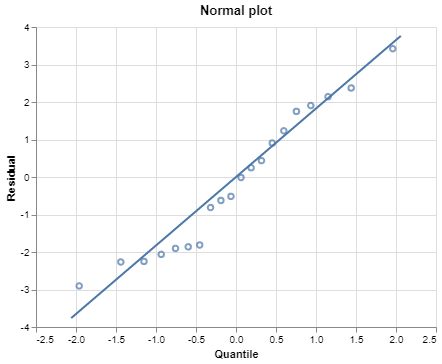

In [12]:
model.normal_plot()

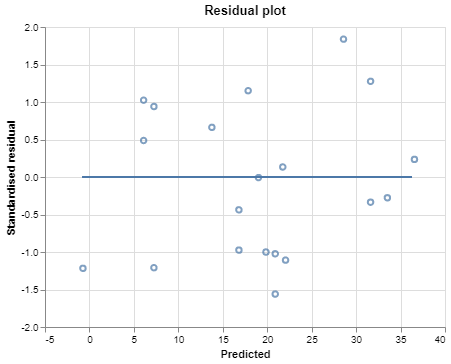

In [13]:
model.residual_plot()

In [14]:
model.residual()

array([-2.26664216,  0.90616735,  1.90616735, -2.25061189,  1.74938811,
        2.14192345, -0.01485579, -1.90499287, -2.90499287, -2.06177212,
        1.23213405, -1.81478227, -0.81478227, -1.8616986 ,  0.24816432,
        3.42097383, -0.6259425 ,  2.3740575 , -0.51607958,  0.4370041 ])

In [15]:
model.r2

0.9928359500278029

In [16]:
model.std

array([[ 0.03130664, -0.03176558],
       [-0.03176558,  0.03606   ]])

In [17]:
model.vif('X1')

2.4789042345962757

# **Selection**

In [18]:
BackwardSelection(df, ['X1', 'X2', 'X1c', 'X2c'], 'y')

Variable: X1, X2, X1c, X2c
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X2c                                                    52.8023                            52.8414        
Test Statistic: 0.011122544996760412
p-value: 0.9174054559030368
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable: X1, X2, X1c
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X1                                                     52.8414                            54.0541        
Test Statistic: 0.36719722129468835
p-value: 0.5530362823653872
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable: X2, X1c
Variable Removed                                       Res S.S. before Removal            

In [19]:
ForwardSelection(df, ['X1', 'X2', 'X1c', 'X2c'], 'y')

Variable: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c                                                    201.1942                           54.0541        
Test Statistic: 46.27548427143375
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable: X2, X1c
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X

In [20]:
StepwiseSelection(df, ['X1', 'X2', 'X1c', 'X2c'], 'y')

Variable: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c                                                    201.1942                           54.0541        
Test Statistic: 46.27548427143375
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable: X2, X1c
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X